# Analysis for wenqin
Reload muons processed wt qe=0.20, see efficiency/purity wt cut on 100 PE

In [1]:
import os, glob, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 25})

In [2]:
def load_dataframe_from_files(dirin, fileprefix, max_files=1000):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {} files wt prefix:\n{}".format(len(files), fileprefix))
    df = pd.read_csv(files[0], comment='#', index_col=False)
    for file in files[1:max_files]:
        print(".", end='')
        dftmp = pd.read_csv(file, comment='#', index_col=False)
        df = pd.concat([df, dftmp])
    print("")
    return df

In [3]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Muons_08_18_2020", "Muons_Snapshots")
fileinprefix = "SnapshotMuon*.csv"

df_mu = load_dataframe_from_files(dirin, fileinprefix)
df_mu = df_mu[df_mu.columns[:-1]]

[Info] Loading 100 files wt prefix:
SnapshotMuon*.csv
...................................................................................................


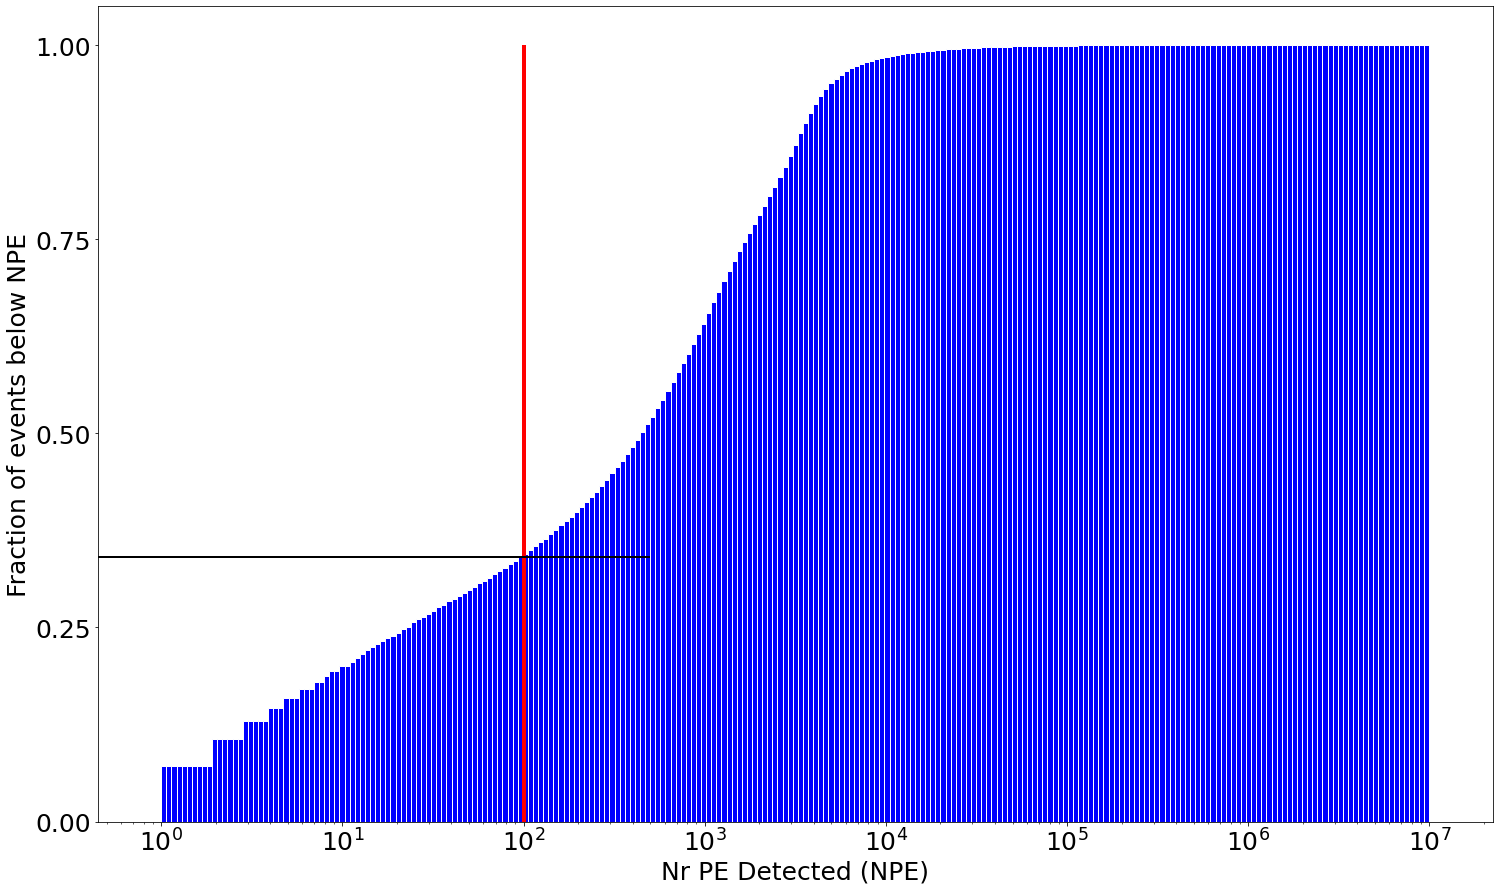

In [35]:
plt.hist(df_mu.pedetected, bins=np.logspace(0, 7, 250), cumulative=True, density=True, color='b', edgecolor='w')
plt.vlines(100, 0, 1, color='r', linewidth=4)
plt.hlines(0.3407, 0, 500, color='k', linewidth=2)
plt.xscale("log")
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("Nr PE Detected (NPE)")
plt.ylabel("Fraction of events below NPE")
plt.show()

In [28]:
len(df_mu[df_mu.pedetected<100])

53517

In [27]:
len(df_mu[df_mu.pedetected>=100]) / len(df_mu)

0.6592510999191377

In [29]:
dirin = os.path.join("..", "..", "Data", "OutputProcessing", "Ar39_08_18_2020", "Ar39_Snapshots")

fileinprefix = "Snapshot1Ar39*.csv"
df_1ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_1ar39 = df_1ar39[df_1ar39.columns[:-1]]

fileinprefix = "Snapshot3Ar39*.csv"
df_3ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_3ar39 = df_3ar39[df_3ar39.columns[:-1]]

fileinprefix = "Snapshot5Ar39*.csv"
df_5ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_5ar39 = df_5ar39[df_5ar39.columns[:-1]]

fileinprefix = "Snapshot7Ar39*.csv"
df_7ar39 = load_dataframe_from_files(dirin, fileinprefix)
df_7ar39 = df_7ar39[df_7ar39.columns[:-1]]

[Info] Loading 100 files wt prefix:
Snapshot1Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot3Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot5Ar39*.csv
...................................................................................................
[Info] Loading 100 files wt prefix:
Snapshot7Ar39*.csv
...................................................................................................


In [30]:
print(len(df_1ar39))
print(len(df_3ar39))
print(len(df_5ar39))
print(len(df_7ar39))

5303515
1767809
1060664
757599


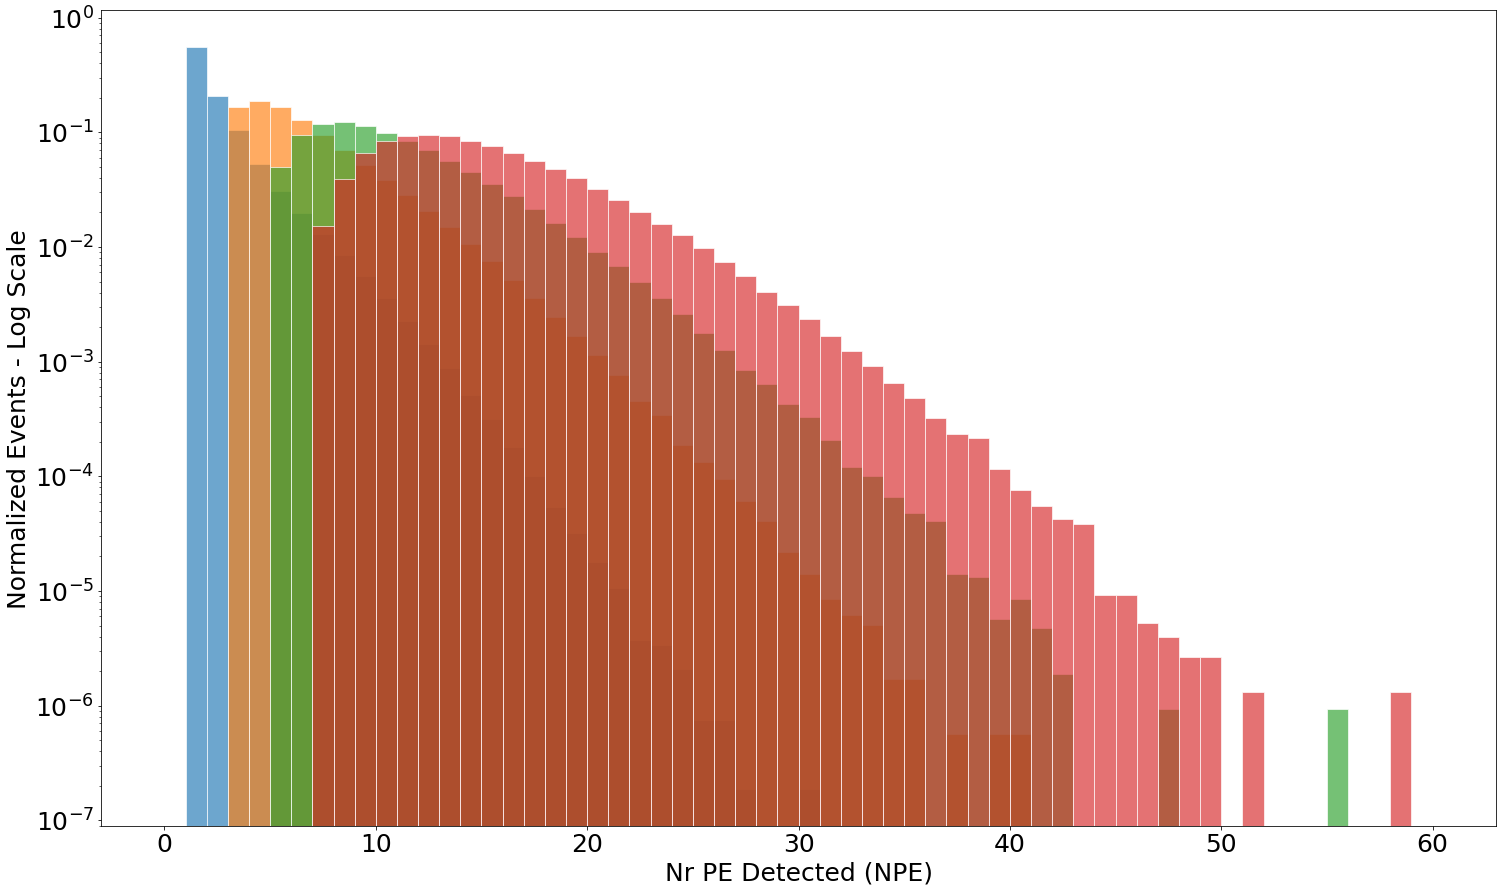

In [38]:
alpha = .65
plt.hist(df_1ar39.pedetected, bins=np.linspace(0, 60, 61), cumulative=False, density=True, alpha=alpha, edgecolor='w')
plt.hist(df_3ar39.pedetected, bins=np.linspace(0, 60, 61), cumulative=False, density=True, alpha=alpha, edgecolor='w')
plt.hist(df_5ar39.pedetected, bins=np.linspace(0, 60, 61), cumulative=False, density=True, alpha=alpha, edgecolor='w')
plt.hist(df_7ar39.pedetected, bins=np.linspace(0, 60, 61), cumulative=False, density=True, alpha=alpha, edgecolor='w')
plt.xlabel("Nr PE Detected (NPE)")
plt.ylabel("Normalized Events - Log Scale")
plt.yscale("log")
plt.show()